In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pathlib
import tqdm

In [2]:
# parse all json files in /resultsl
list_jsons = glob.glob("results/*/*/*.json")
keys = ["best_coil_config_cost", "default_coil_config_cost", "cost_improvement_absolute", "cost_improvement_relative", "cost_function_name", "cost_function_direction", "simulation_data"]

rows = []
for file in list_jsons:
    file = pathlib.Path(file)
    with open (file) as f:
        data = json.load(f)
    data = {key: data[key] for key in keys}
    #extract GROUP_NAME /results/GROUP_NAME/*/*.json from path
    group_name = file.parts[1]
    data["group_name"] = group_name
    rows.append(data)
df = pd.DataFrame(rows, )

In [3]:
# remove group_name "group_6_2" from df
df = df[df["group_name"] != "group6_2"]

In [4]:
# select only cost function name == "B1HomogeneityCost"
df_homogeneity = df[df["cost_function_name"] == "B1HomogeneityCost"]

# select only cost function name == "B1HomogeneitySARCost"
df_sar = df[df["cost_function_name"] == "B1HomogeneitySARCost"]

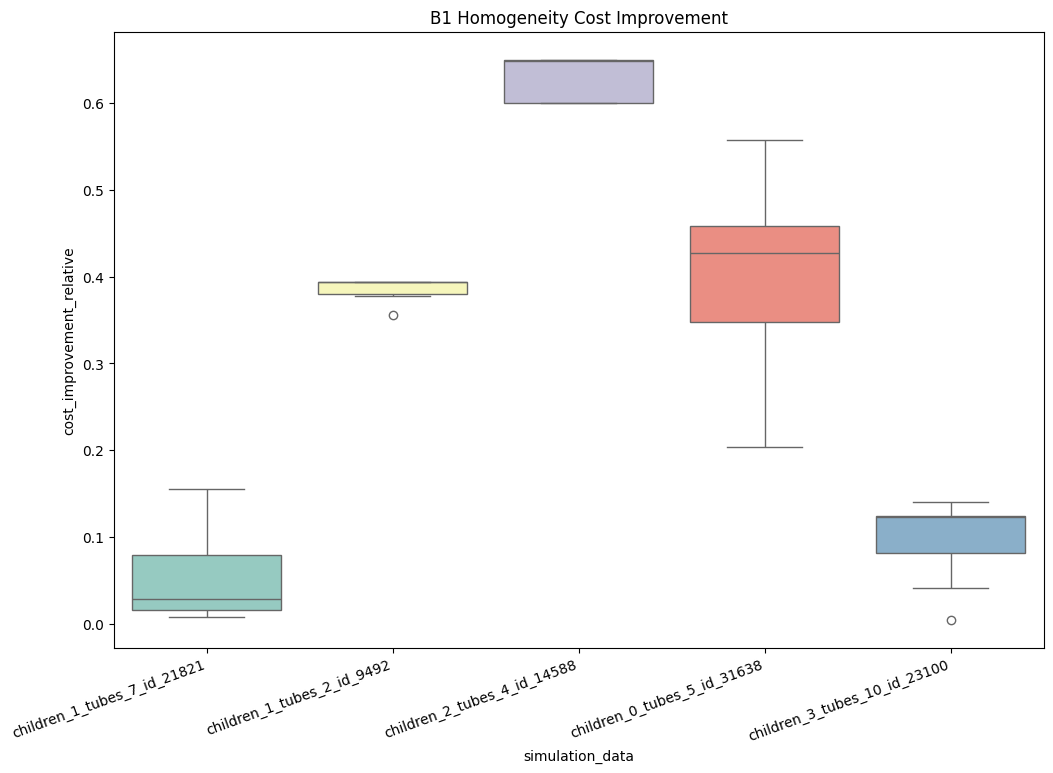

In [ ]:
sns.boxplot(data=df_homogeneity, x="simulation_data", y="cost_improvement_relative", hue="simulation_data", palette="Set3")
plt.title("B1 Homogeneity Cost Improvement")
plt.xticks(rotation=20, ha='right')
plt.gcf().set_size_inches(12, 8)
if not pathlib.Path("results/overall").exists():
    pathlib.Path("results/overall").mkdir(parents=True)
plt.savefig("results/overall/homogeneity_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

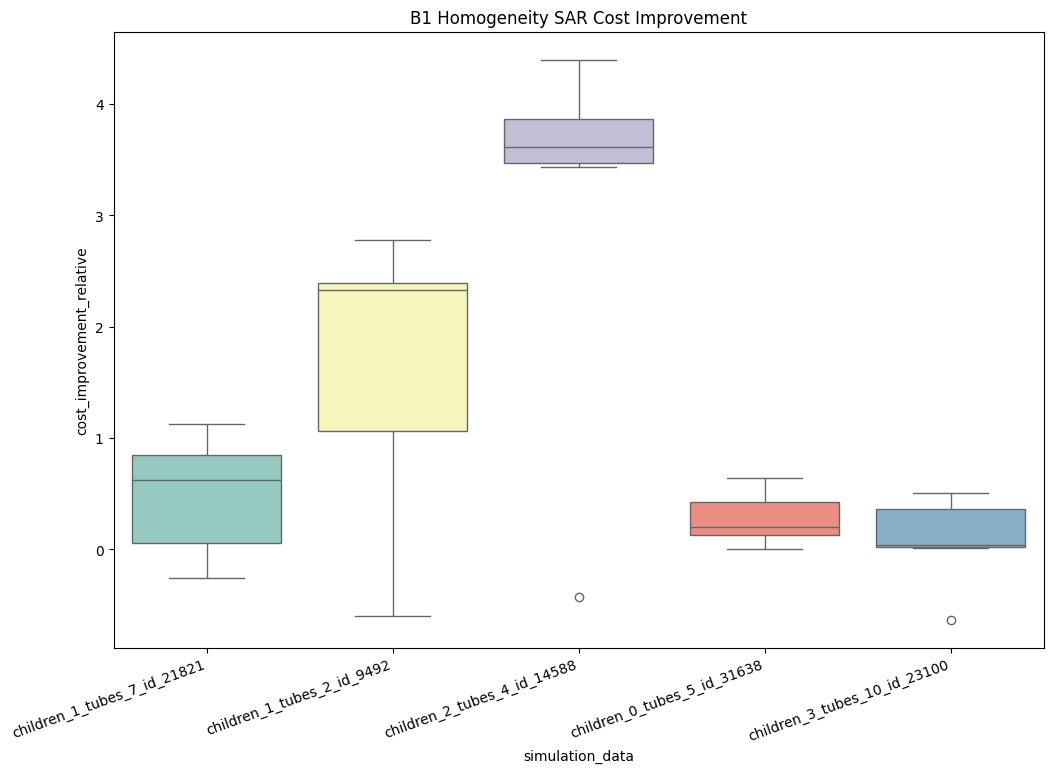

In [17]:
sns.boxplot(data=df_sar, x="simulation_data", y="cost_improvement_relative", hue="simulation_data", palette="Set3")
plt.title("B1 Homogeneity SAR Cost Improvement")
plt.xticks(rotation=20, ha='right')
plt.gcf().set_size_inches(12, 8)
plt.show()

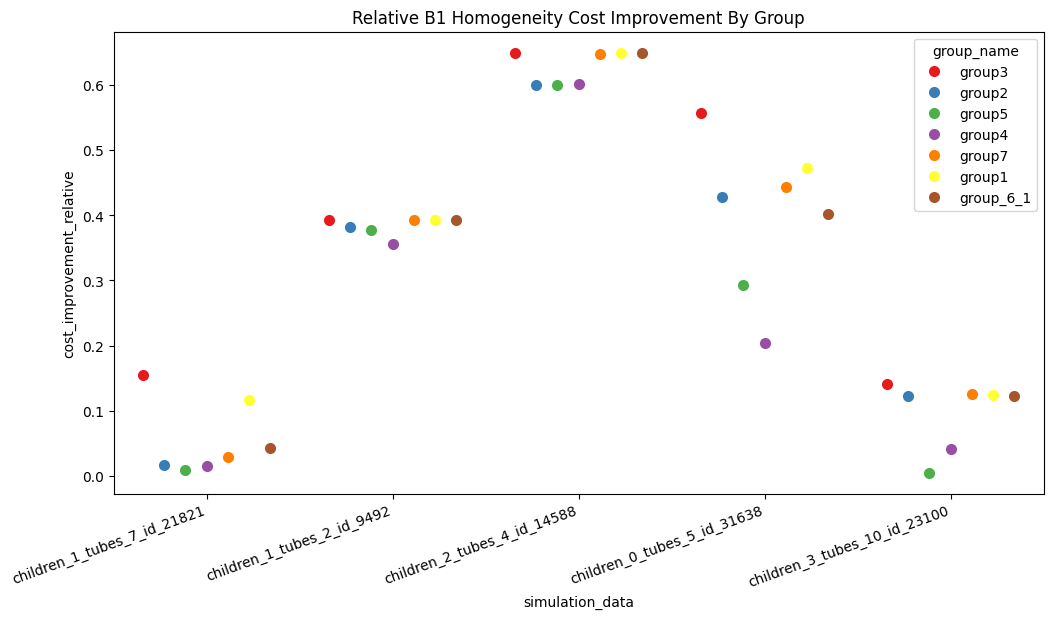

In [7]:
sns.stripplot(data=df_homogeneity, x="simulation_data", y="cost_improvement_relative", hue="group_name", palette="Set1", size=8, dodge=True)
plt.title("Relative B1 Homogeneity Cost Improvement By Group")
plt.xticks(rotation=20, ha='right')
plt.gcf().set_size_inches(12, 6)
plt.show()

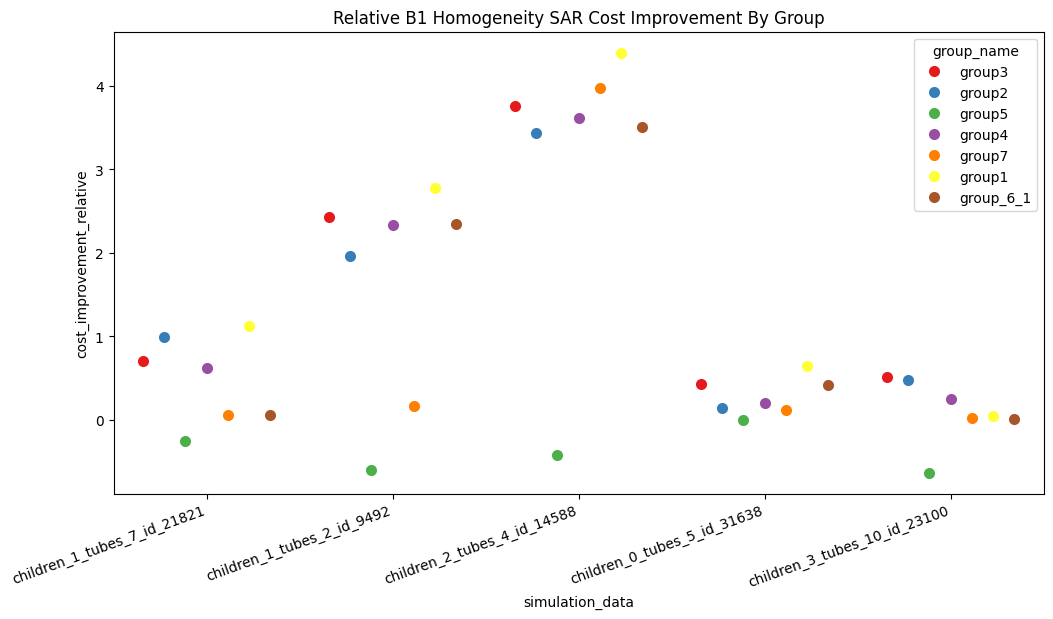

In [8]:
sns.stripplot(data=df_sar, x="simulation_data", y="cost_improvement_relative", hue="group_name", palette="Set1", size=8, dodge=True)
plt.title("Relative B1 Homogeneity SAR Cost Improvement By Group")
plt.xticks(rotation=20, ha='right')
plt.gcf().set_size_inches(12, 6)
plt.show()

In [9]:

df['rank'] = df.groupby(['cost_function_name', 'simulation_data'])['cost_improvement_relative'].rank(method='first', ascending=False)

rank_table = df.pivot(index=['cost_function_name', 'simulation_data'], columns='group_name', values='rank')
rank_table


group_name                                         group1  group2  group3  \
cost_function_name   simulation_data                                        
B1HomogeneityCost    children_0_tubes_5_id_31638      2.0     4.0     1.0   
                     children_1_tubes_2_id_9492       2.0     5.0     4.0   
                     children_1_tubes_7_id_21821      2.0     5.0     1.0   
                     children_2_tubes_4_id_14588      1.0     7.0     3.0   
                     children_3_tubes_10_id_23100     3.0     5.0     1.0   
B1HomogeneitySARCost children_0_tubes_5_id_31638      1.0     5.0     2.0   
                     children_1_tubes_2_id_9492       1.0     5.0     2.0   
                     children_1_tubes_7_id_21821      1.0     2.0     3.0   
                     children_2_tubes_4_id_14588      1.0     6.0     3.0   
                     children_3_tubes_10_id_23100     4.0     2.0     1.0   

group_name                                         group4  group5  group7  \
cost_function_name   simulation_data                                        
B1HomogeneityCost    children_0_tubes_5_id_31638      7.0     6.0     3.0   
                     children_1_tubes_2_id_9492       7.0     6.0     3.0   
                     children_1_tubes_7_id_21821      6.0     7.0     4.0   
                     children_2_tubes_4_id_14588      5.0     6.0     4.0   
                     children_3_tubes_10_id_23100     6.0     7.0     2.0   
B1HomogeneitySARCost children_0_tubes_5_id_31638      4.0     7.0     6.0   
                     children_1_tubes_2_id_9492       4.0     7.0     6.0   
                     children_1_tubes_7_id_21821      4.0     7.0     6.0   
                     children_2_tubes_4_id_14588      4.0     7.0     2.0   
                     children_3_tubes_10_id_23100     3.0     7.0     5.0   

group_name                                         group_6_1  
cost_function_name   simulation_data                          
B1HomogeneityCost    children_0_tubes_5_id_31638         5.0  
                     children_1_tubes_2_id_9492          1.0  
                     children_1_tubes_7_id_21821         3.0  
                     children_2_tubes_4_id_14588         2.0  
                     children_3_tubes_10_id_23100        4.0  
B1HomogeneitySARCost children_0_tubes_5_id_31638         3.0  
                     children_1_tubes_2_id_9492          3.0  
                     children_1_tubes_7_id_21821         5.0  
                     children_2_tubes_4_id_14588         5.0  
                     children_3_tubes_10_id_23100        6.0

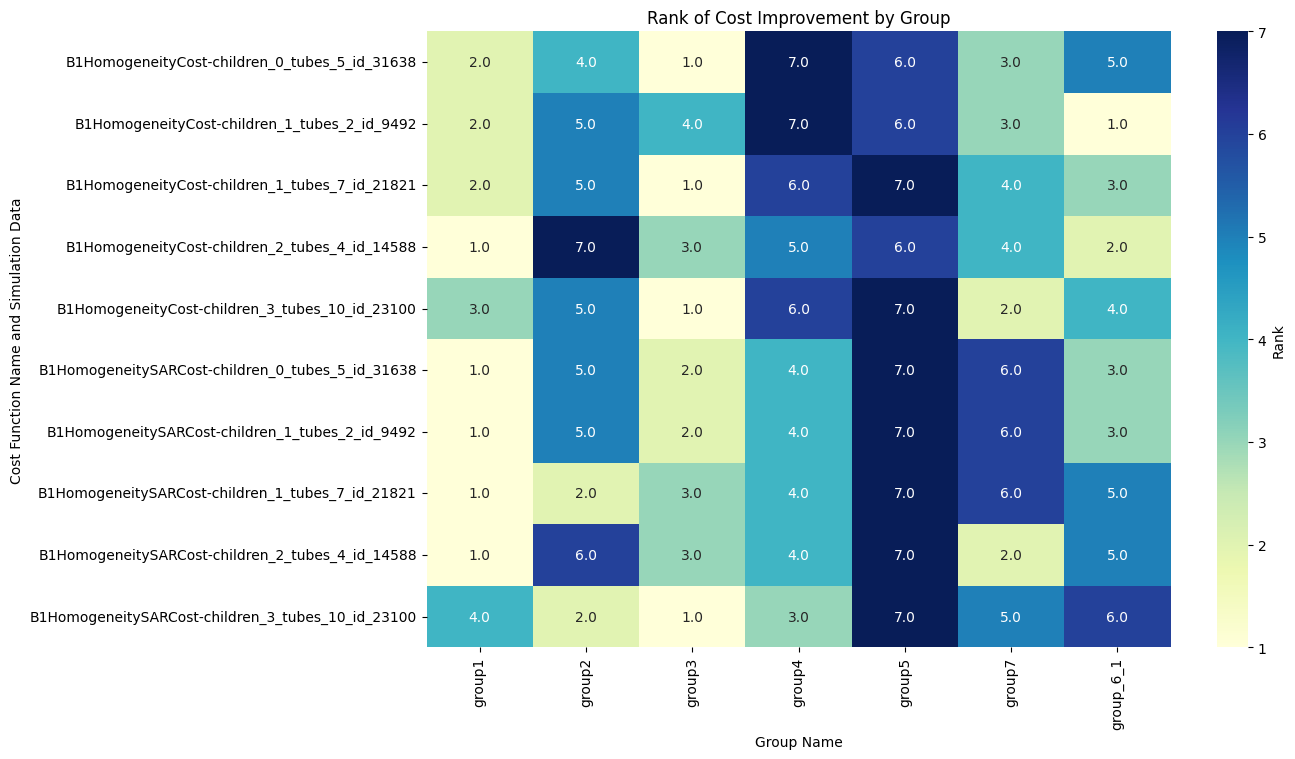

In [10]:
sns.heatmap(rank_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Rank'})
plt.title("Rank of Cost Improvement by Group")
plt.xlabel("Group Name")
plt.ylabel("Cost Function Name and Simulation Data")
plt.gcf().set_size_inches(12, 8)
plt.show()

In [11]:
# calculate average rank for each group
average_rank_table = rank_table.copy()
average_rank_table = average_rank_table.fillna(0)
average_rank_table = average_rank_table.astype(float)
average_rank_table = average_rank_table.replace(0, np.nan)
average_rank_table = average_rank_table.mean(axis=0)
average_rank_table = average_rank_table.sort_values(ascending=True)
average_rank_table = average_rank_table.reset_index()
average_rank_table.columns = ['group_name', 'average_rank']
average_rank_table


,group_name,average_rank
0,group1,1.8
1,group3,2.1
2,group_6_1,3.7
3,group7,4.1
4,group2,4.6
5,group4,5.0
6,group5,6.7


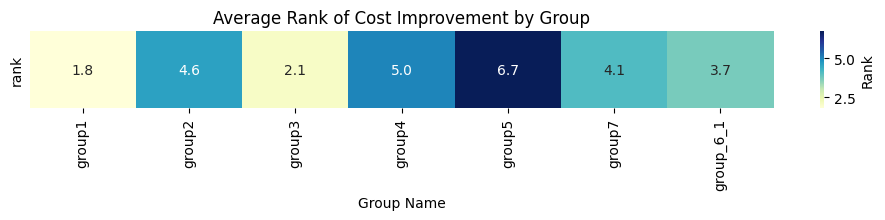

In [12]:
heatmap_plot_ranks = average_rank_table.copy()
heatmap_plot_ranks["rank"] = "average_rank"
heatmap_plot_ranks = heatmap_plot_ranks.pivot(index="rank", columns="group_name", values="average_rank")
sns.heatmap(heatmap_plot_ranks, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Rank'})
plt.title("Average Rank of Cost Improvement by Group")
plt.xlabel("Group Name")
plt.yticks([], [])
plt.gcf().set_size_inches(12, 1)
plt.show()

In [15]:
# plot all shifted fields of all groups
from reference.src.data import Simulation, CoilConfig, SimulationData
from reference.src.data.utils import SARCalculator, B1Calculator
from mpl_toolkits.axes_grid1 import make_axes_locatable

base_sim_path = pathlib.Path("test_data/simulations")
antenna_path = pathlib.Path("test_data/antenna/antenna.h5")


def calculate_features_to_plot(simulation_data: SimulationData):
    sar_calculator = SARCalculator()
    b1_calculator = B1Calculator()
    abs_efield = np.linalg.norm(simulation_data.field[0], axis=(0,1))
    abs_hfield = np.linalg.norm(simulation_data.field[1], axis=(0,1))
    sar = sar_calculator(simulation_data)*simulation_data.subject
    b1_plus_abs = np.abs(b1_calculator(simulation_data))*simulation_data.subject

    abs_efield[~simulation_data.subject] = None
    abs_hfield[~simulation_data.subject] = None
    sar[~simulation_data.subject] = None
    b1_plus_abs[~simulation_data.subject] = None

    features_to_plot = {
        "abs_efield": abs_efield,
        "abs_hfield": abs_hfield,
        "sar": sar,
        "b1_plus_abs": b1_plus_abs
    }
    return features_to_plot

def calculate_features_min_max(features_to_plot: dict):
    min_max = {}
    for name, feature in features_to_plot.items():
        min_val = np.nanmin(feature)
        max_val = np.nanmax(feature)
        min_max[name] = (min_val, max_val)
    return min_max

def plot_simulation(features_to_plot: dict, group_name: str, simulation_name: str, cost_function_name: str, min_max: dict = None):
    if min_max is None:
        min_max = {key: (None, None) for key in features_to_plot.keys()}
    slice_id = 25
    num_features = len(features_to_plot)
    i = 0
    fig, ax = plt.subplots(1, num_features, figsize=(20, 20))
    for name, feature in features_to_plot.items():
        selected_ax = ax[i]
        i += 1
        
        norm = None
        if name == "coils_re":
            cmap = 'gray'
        elif name == "abs_efield":
            cmap = 'viridis'
            norm = 'log'
            unit = "V/m"
            title = "E-field (V/m)"
        elif name == "abs_hfield":
            cmap = 'coolwarm'
            norm = 'log'
            unit = "A/m"
            title = "H-field (A/m)"
        elif name == "conductivity":
            norm = 'log'
            cmap = 'plasma'
        elif name == "sar":
            norm = 'log'
            cmap = 'hot'
            unit = "W/kg"
            title = "SAR (W/kg)"
        elif name == "b1_plus_abs":
            cmap = 'coolwarm'
            norm = "log"
            unit = "uT"
            title = "Absolute B1+ (uT)"
        else:
            cmap = 'plasma'

        selected_ax.set_title(title)
        im = selected_ax.imshow(feature[:,:,slice_id], cmap=cmap, norm=None, vmin=min_max[name][0], vmax=min_max[name][0])
        divider = make_axes_locatable(selected_ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(im, cax=cax)
        cbar.ax.set_title(unit)
        #cbar.set_label(unit, loc="top")

        selected_ax.set_xticks([])
        selected_ax.set_yticks([])
    
    fig.supylabel(group_name, fontsize=20)
    plt.tight_layout(rect=(0.01, 0.0, 1, 1))
    figure_save_path = pathlib.Path(f"figures/{simulation_name}/{cost_function_name}/{group_name}.png")
    if not figure_save_path.parent.exists():
        figure_save_path.parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(figure_save_path, bbox_inches='tight', pad_inches=0.1)
    plt.close()
    return 1

In [18]:
file = list_jsons[0]

GROUPS = ["group1", "group2", "group3", "group4", "group5", "group_6_1", "group7", "group6_2"]
COST_FUNCTIONS = ["B1HomogeneityCost", "B1HomogeneitySARCost"]
SIMULATIONS = ["children_0_tubes_5_id_31638.h5","children_1_tubes_2_id_9492.h5","children_1_tubes_7_id_21821.h5","children_2_tubes_4_id_14588.h5","children_3_tubes_10_id_23100.h5"]
base_path = pathlib.Path("results")
base_path_data = pathlib.Path("test_data/simulations")
for sim in tqdm.tqdm(SIMULATIONS):
    simulation_path = base_path_data / sim
    simulation_name = sim.replace(".h5", "")
    simulation_results_file = f"results_{simulation_name}.json"
    simulation = Simulation(simulation_path,
                            "test_data/antenna/antenna.h5")

    for cf in COST_FUNCTIONS:
        # plot default coil and get min max
        default_coil_config = CoilConfig()
        default_sim_data = simulation(default_coil_config)

        features_to_plot = calculate_features_to_plot(default_sim_data)
        features_min_max = calculate_features_min_max(features_to_plot)
        plot_simulation(features_to_plot, "default_coil", sim, cf)
        for group in GROUPS:
            results_file = base_path / group / cf / simulation_results_file
            #print(list(results_file.iterdir()))
            with open (results_file) as f:
                data = json.load(f)
            solution_config = CoilConfig(phase=data["best_coil_phase"], amplitude=data["best_coil_amplitude"])
            solution_field = simulation(solution_config)

            features_to_plot = calculate_features_to_plot(solution_field)
            plot_simulation(features_to_plot, group, sim, cf)


100%|██████████| 5/5 [00:40<00:00,  8.02s/it]
